In [1]:
sys.path.extend(["../../src/core", "../../src/utils"])
from io_manager import Load
from draw import Draw

import warnings
warnings.filterwarnings("ignore") # suppress warnings
import matplotlib.pyplot as plt
import numpy as np

from pyutils.pyplot import Plot

In [2]:
ana_labels = {
    "Before" : [
        "SU2020a_CRY_onspill-LH_aw_bug",
        "SU2020a_signal_onspill-LH_aw_bug",
        "SU2020b_CRY_onspill-LH_aw_bug",
        "SU2020b_signal_onspill-LH_aw_bug",
        "SU2020c_CRY_onspill-LH_aw_bug",
        "SU2020c_signal_onspill-LH_aw_bug",
        "SU2020d_CRY_onspill-LH_aw_bug",
        "SU2020d_signal_onspill-LH_aw_bug",
        "SU2020e_CRY_onspill-LH_aw_bug",
        "SU2020e_signal_onspill-LH_aw_bug"
    ],
    
    "After" : [
        "SU2020a_CRY_onspill-LH_aw",
        "SU2020a_signal_onspill-LH_aw",
        "SU2020b_CRY_onspill-LH_aw",
        "SU2020b_signal_onspill-LH_aw",
        "SU2020c_CRY_onspill-LH_aw",
        "SU2020c_signal_onspill-LH_aw",
        "SU2020d_CRY_onspill-LH_aw",
        "SU2020d_signal_onspill-LH_aw",
        "SU2020e_CRY_onspill-LH_aw",
        "SU2020e_signal_onspill-LH_aw"
    ]
    
}

In [3]:
def load(ana_labels):
    results = {}
    for key, ana_labels_list in ana_labels.items():  
        results[key] = {}  
        for ana_label in ana_labels_list:
            loader = Load(
                in_path=f"../../output/results/{ana_label}"
            )
            results[key][ana_label] = loader.load_pkl() 
    return results

results = load(ana_labels)

[Load] ✅ Initialised with out_path=../../output/results/SU2020a_CRY_onspill-LH_aw_bug
[Load] ✅ Successfully loaded results from ../../output/results/SU2020a_CRY_onspill-LH_aw_bug/results.pkl
[Load] ✅ Initialised with out_path=../../output/results/SU2020a_signal_onspill-LH_aw_bug
[Load] ✅ Successfully loaded results from ../../output/results/SU2020a_signal_onspill-LH_aw_bug/results.pkl
[Load] ✅ Initialised with out_path=../../output/results/SU2020b_CRY_onspill-LH_aw_bug
[Load] ✅ Successfully loaded results from ../../output/results/SU2020b_CRY_onspill-LH_aw_bug/results.pkl
[Load] ✅ Initialised with out_path=../../output/results/SU2020b_signal_onspill-LH_aw_bug
[Load] ✅ Successfully loaded results from ../../output/results/SU2020b_signal_onspill-LH_aw_bug/results.pkl
[Load] ✅ Initialised with out_path=../../output/results/SU2020c_CRY_onspill-LH_aw_bug
[Load] ✅ Successfully loaded results from ../../output/results/SU2020c_CRY_onspill-LH_aw_bug/results.pkl
[Load] ✅ Initialised with out_pat

In [4]:
plot = Plot() # just for style file

[pyplot] ⭐️ Initialised Plot with mu2e.mplstyle and verbosity = 1


In [5]:
display(results["After"]["SU2020a_CRY_onspill-LH_aw"]["analysis"])

,Type,CE-like (wide),CE-like (ext),CE-like (sig),No veto (wide),No veto (ext),No veto (sig)
0,k,16989,2618,326,8,3,1
1,N,41100000000,41100000000,41100000000,16989,2618,326
2,Eff [%],0.000041,0.000006,0.000001,99.952911,99.885409,99.693252
3,Eff Err$-$ [%],-0.0,-0.0,-0.0,-0.019842,-0.087846,-0.493454
4,Eff Err$+$ [%],0.0,0.0,0.0,0.013962,0.049751,0.18952
5,Rate 1B [$\text{day}^{-1}$],44.255391,6.819743,0.849212,0.02084,0.007815,0.002605
6,Rate 1B Err$-$ [$\text{day}^{-1}$],-0.337658,-0.132548,-0.046758,-0.007181,-0.004238,-0.002151
7,Rate 1B Err$+$ [$\text{day}^{-1}$],0.340253,0.135159,0.049416,0.010225,0.007564,0.005961
8,Rate 2B [$\text{day}^{-1}$],33.810019,5.210114,0.648777,0.015921,0.00597,0.00199
9,Rate 2B Err$-$ [$\text{day}^{-1}$],-0.257962,-0.101263,-0.035722,-0.005486,-0.003238,-0.001643


[pyplot] ⭐️ Initialised Plot with mu2e.mplstyle and verbosity = 1
Wrote ../../output/images/comp/bo_eff_comp_aw_before_after_abcde_2x3.png


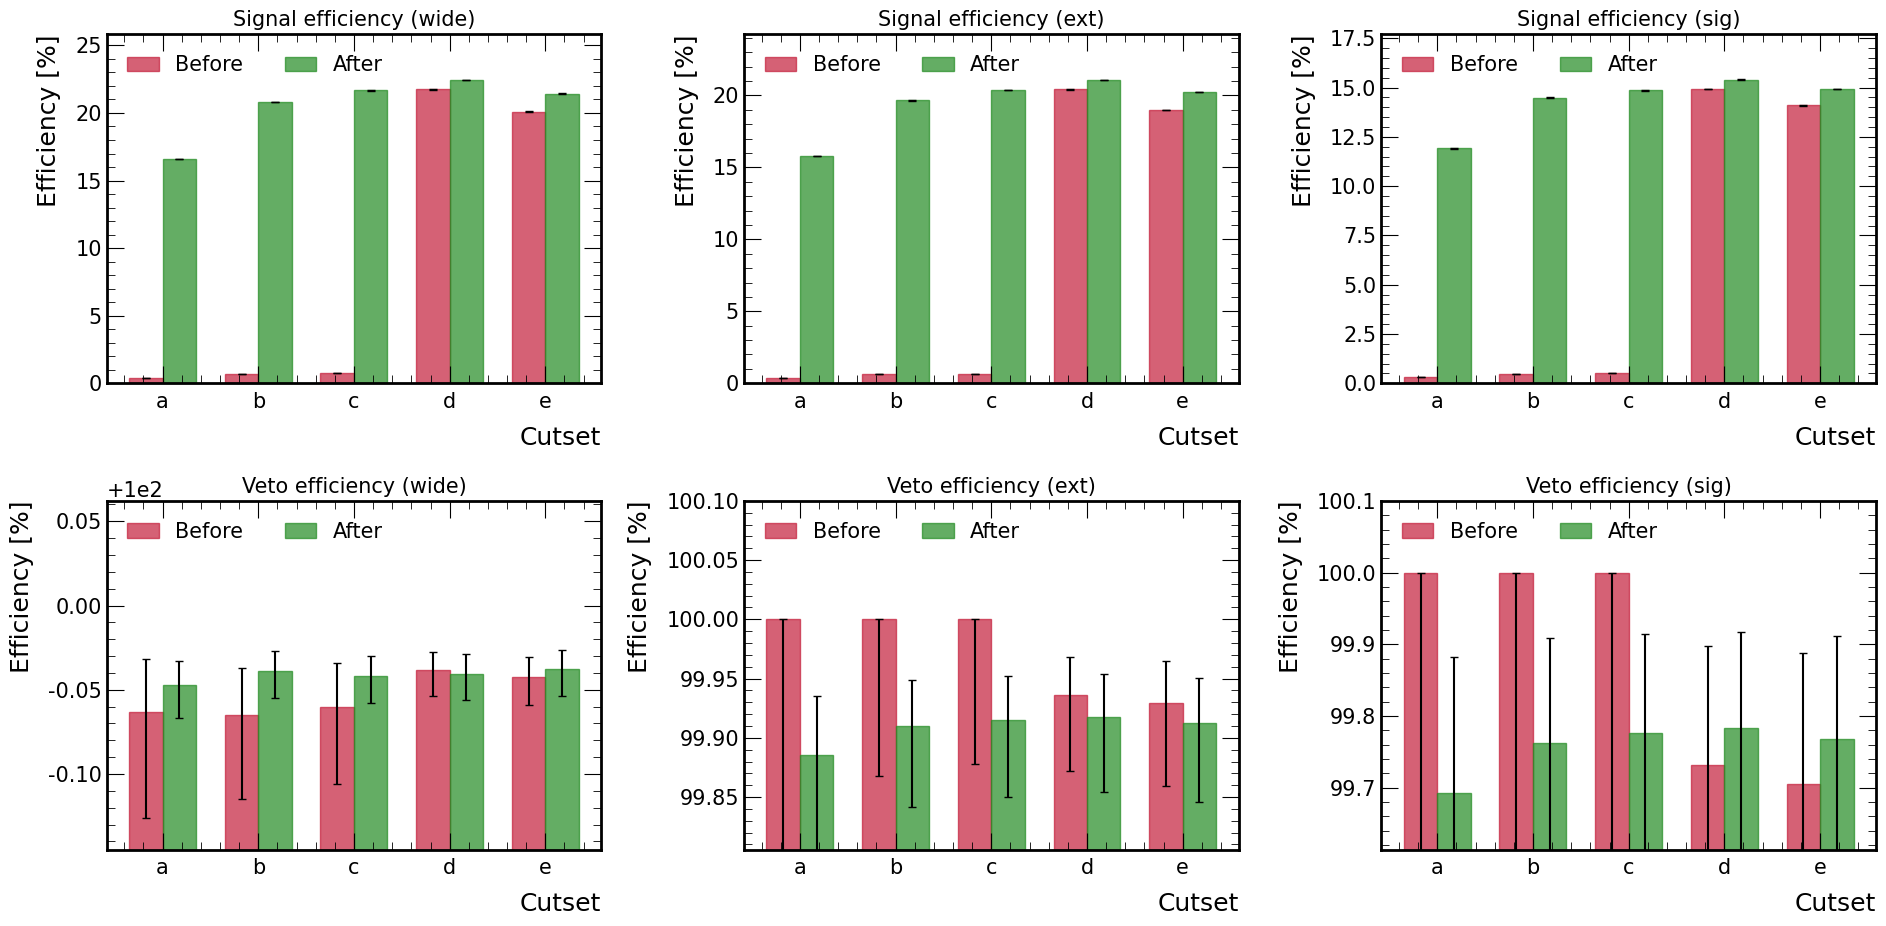

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from pyutils.pyplot import Plot

def plot_efficiency_comparison(results, cutsets=None, figsize=(6.4*3, 4.8*2), save_path=None):
    """
    Plot efficiency comparison directly from results DataFrames.
    
    Parameters:
    -----------
    results : dict
        Nested dictionary with structure: results[period][analysis_name]["analysis"] = DataFrame
    cutsets : list, optional
        List of cutset identifiers to include (e.g., ["SU2020a", "SU2020b", ...])
        If None, will extract from analysis names
    figsize : tuple
        Figure size (width, height)
    save_path : str, optional
        Path to save the figure
    """
    
    plotter = Plot()
    fig, axes = plt.subplots(2, 3, figsize=figsize)
    
    windows = ["wide", "ext", "sig"]
    periods = list(results.keys())  # e.g., ["Before", "After"]
    
    # Colors for before/after
    colors = {"Before": "#C41E3A", "After": "#228B22"}
    
    # If cutsets not provided, extract from analysis names
    if cutsets is None:
        cutsets = set()
        for period in periods:
            for analysis_name in results[period].keys():
                # Extract cutset from analysis name (assuming format like "SU2020a_...")
                cutset = analysis_name.split("_")[0]
                cutsets.add(cutset)
        cutsets = sorted(list(cutsets))
    
    width = 0.35
    
    # Plot signal efficiencies (top row)
    for col, window in enumerate(windows):
        ax = axes[0, col]
        
        # Collect data for this window
        data_by_period = {period: {"cutsets": [], "effs": [], "errs": []} for period in periods}
        
        for period in periods:
            for analysis_name, analysis_data in results[period].items():
                if "signal" in analysis_name.lower():
                    # Extract cutset from analysis name
                    cutset = analysis_name.split("_")[0]
                    if cutset in cutsets:
                        df = analysis_data["analysis"]
                        
                        try:
                            # Extract efficiency and errors from DataFrame
                            col_name = f"CE-like ({window})"
                            if col_name in df.columns:
                                eff = float(df.at[2, col_name])  # Row 2: Eff [%]
                                err_low = abs(float(df.at[3, col_name]))  # Row 3: Eff Err− [%]
                                err_hi = float(df.at[4, col_name])  # Row 4: Eff Err+ [%]
                                
                                data_by_period[period]["cutsets"].append(cutset)
                                data_by_period[period]["effs"].append(eff)
                                data_by_period[period]["errs"].append([err_low, err_hi])
                        except (KeyError, ValueError, IndexError) as e:
                            print(f"Warning: Could not extract signal data for {analysis_name}, {window}: {e}")
        
        # Plot the data
        if any(data_by_period[period]["effs"] for period in periods):
            # Find common cutsets
            common_cutsets = set(data_by_period[periods[0]]["cutsets"])
            for period in periods[1:]:
                common_cutsets &= set(data_by_period[period]["cutsets"])
            common_cutsets = sorted(list(common_cutsets))
            
            if common_cutsets:
                x = np.arange(len(common_cutsets))
                
                for i, period in enumerate(periods):
                    # Reorder data to match common_cutsets
                    effs = []
                    errs = []
                    for cutset in common_cutsets:
                        idx = data_by_period[period]["cutsets"].index(cutset)
                        effs.append(data_by_period[period]["effs"][idx])
                        errs.append(data_by_period[period]["errs"][idx])
                    
                    errs = np.array(errs).T
                    offset = (i - len(periods)/2 + 0.5) * width
                    
                    ax.bar(x + offset, effs, width, yerr=errs, capsize=3,
                           color=colors[period], alpha=0.7, edgecolor=colors[period], 
                           label=period)
                
                ax.set_xticks(x)
                ax.set_xticklabels([cutset.replace("SU2020", "") for cutset in common_cutsets])
                ax.set_ylim(0, max([max(data_by_period[p]["effs"]) for p in periods if data_by_period[p]["effs"]]) * 1.15)
            else:
                ax.text(0.5, 0.5, "No common signal data", ha="center", va="center", transform=ax.transAxes)
        else:
            ax.text(0.5, 0.5, "No signal data available", ha="center", va="center", transform=ax.transAxes)
        
        ax.set_ylabel("Efficiency [%]")
        ax.set_xlabel("Cutset")
        ax.set_title(f"Signal efficiency ({window})")
        ax.legend(loc="upper left", ncols=len(periods))
    
    # Plot veto efficiencies (bottom row)
    for col, window in enumerate(windows):
        ax = axes[1, col]
        
        # Collect data for this window
        data_by_period = {period: {"cutsets": [], "effs": [], "errs": []} for period in periods}
        
        for period in periods:
            for analysis_name, analysis_data in results[period].items():
                if "CRY" in analysis_name or "veto" in analysis_name.lower():
                    # Extract cutset from analysis name
                    cutset = analysis_name.split("_")[0]
                    if cutset in cutsets:
                        df = analysis_data["analysis"]
                        
                        try:
                            # Extract efficiency and errors from DataFrame
                            col_name = f"No veto ({window})"
                            if col_name in df.columns:
                                eff = float(df.at[2, col_name])  # Row 2: Eff [%]
                                err_low = abs(float(df.at[3, col_name]))  # Row 3: Eff Err− [%]
                                err_hi = float(df.at[4, col_name])  # Row 4: Eff Err+ [%]
                                
                                data_by_period[period]["cutsets"].append(cutset)
                                data_by_period[period]["effs"].append(eff)
                                data_by_period[period]["errs"].append([err_low, err_hi])
                        except (KeyError, ValueError, IndexError) as e:
                            print(f"Warning: Could not extract veto data for {analysis_name}, {window}: {e}")
        
        # Plot the data
        if any(data_by_period[period]["effs"] for period in periods):
            # Find common cutsets
            common_cutsets = set(data_by_period[periods[0]]["cutsets"])
            for period in periods[1:]:
                common_cutsets &= set(data_by_period[period]["cutsets"])
            common_cutsets = sorted(list(common_cutsets))
            
            if common_cutsets:
                x = np.arange(len(common_cutsets))
                
                for i, period in enumerate(periods):
                    # Reorder data to match common_cutsets
                    effs = []
                    errs = []
                    for cutset in common_cutsets:
                        idx = data_by_period[period]["cutsets"].index(cutset)
                        effs.append(data_by_period[period]["effs"][idx])
                        errs.append(data_by_period[period]["errs"][idx])
                    
                    errs = np.array(errs).T
                    offset = (i - len(periods)/2 + 0.5) * width
                    
                    ax.bar(x + offset, effs, width, yerr=errs, capsize=3,
                           color=colors[period], alpha=0.7, edgecolor=colors[period], 
                           label=period)
                
                ax.set_xticks(x)
                ax.set_xticklabels([cutset.replace("SU2020", "") for cutset in common_cutsets])
                
                # Set y-axis limits for veto efficiency
                all_effs = [eff for period in periods for eff in data_by_period[period]["effs"]]
                # all_errs = [err for period in periods for err in data_by_period[period]["errs"]]
                # print(all_errs)
                if all_effs:
                    veto_min, veto_max = min(all_effs), max(all_effs)
                    ax.set_ylim(veto_min*0.9992, veto_max*1.001) # veto_min * 0.999, veto_min*1.001)
        #     else:
        #         ax.text(0.5, 0.5, "No common veto data", ha="center", va="center", transform=ax.transAxes)
        # else:
        #     ax.text(0.5, 0.5, "No veto data available", ha="center", va="center", transform=ax.transAxes)
        
        ax.set_ylabel("Efficiency [%]")
        ax.set_xlabel("Cutset")
        ax.set_title(f"Veto efficiency ({window})")
        ax.legend(loc="upper left", ncols=len(periods))
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300)
        print(f"Wrote {save_path}")
    
    plt.show()

plot_efficiency_comparison(
    results, 
    cutsets=["SU2020a", "SU2020b", "SU2020c", "SU2020d", "SU2020e"],
    save_path="../../output/images/comp/bo_eff_comp_aw_before_after_abcde_2x3.png"
)

## Momentum resolution

[pyprint] ⭐️ Initialised Print with verbose = False and precision = 1
[Plot] ⭐️ Initialised


KeyError: 'mom_res'

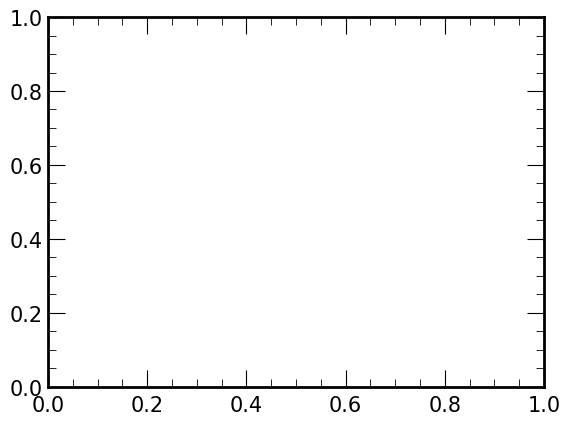

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import moyal

def reverse_landau_function(x, amplitude, mpv, sigma):
    """
    Reverse Landau distribution function (flipped horizontally)
    Sharp cutoff on the right, long tail to the left
    
    Parameters:
    amplitude: height scaling factor
    mpv: most probable value (peak position)
    sigma: width parameter
    """
    return amplitude * moyal.pdf((mpv - x) / sigma, 0, 1) / sigma

def fit_landau(hist, selection='All', fit_range=None):
    """
    Fit reverse Landau distribution to momentum resolution histogram
    
    Parameters:
    hist: your hist library histogram
    selection: selection category ('All', 'Preselect', 'CE-like', 'Unvetoed')
    fit_range: tuple (min, max) to restrict fitting to core region
    
    Returns:
    fitted_params: [amplitude, mpv, sigma]
    param_errors: uncertainties on fitted parameters
    resolution: momentum resolution (sigma)
    reduced_chi2: reduced chi-squared goodness of fit
    """
    
    # Extract data from histogram
    mom_res_axis = hist.axes[0]
    bin_centers = mom_res_axis.centers
    
    try:
        hist_values = hist[{'selection': selection}].values()
    except:
        hist_values = hist[:, selection].values()
    
    print(f"Fitting Reverse Landau to selection: {selection}")
    print(f"Momentum range: {bin_centers.min():.2f} to {bin_centers.max():.2f} MeV/c")
    
    # Apply fit range restriction if specified
    original_bin_centers = bin_centers.copy()
    original_hist_values = hist_values.copy()
    
    if fit_range is not None:
        mask_range = (bin_centers >= fit_range[0]) & (bin_centers <= fit_range[1])
        bin_centers = bin_centers[mask_range]
        hist_values = hist_values[mask_range]
        print(f"Fitting only core region: {fit_range[0]:.1f} to {fit_range[1]:.1f} MeV/c")
    
    print(f"Total counts in fit region: {np.sum(hist_values):.0f}")
    
    # Remove zero bins
    mask = hist_values > 0
    bin_centers_fit = bin_centers[mask]
    hist_values_fit = hist_values[mask]
    
    # Initial parameter guesses
    max_val = np.max(hist_values_fit)
    peak_pos = bin_centers_fit[np.argmax(hist_values_fit)]
    
    # Estimate width from data
    half_max = max_val / 2
    indices = np.where(hist_values_fit > half_max)[0]
    if len(indices) > 1:
        width_estimate = bin_centers_fit[indices[-1]] - bin_centers_fit[indices[0]]
    else:
        width_estimate = 1.0
    
    initial_params = [max_val, peak_pos, width_estimate]
    
    try:
        # Fit with Poisson weighting
        weights = 1.0 / np.sqrt(np.maximum(hist_values_fit, 1))
        
        popt, pcov = curve_fit(
            reverse_landau_function, bin_centers_fit, hist_values_fit,
            p0=initial_params, sigma=weights, maxfev=5000
        )
        
        param_errors = np.sqrt(np.diag(pcov))
        resolution = abs(popt[2])  # sigma parameter
        
        # Calculate reduced chi-squared
        y_fitted = reverse_landau_function(bin_centers_fit, *popt)
        chi_squared = np.sum(((hist_values_fit - y_fitted)**2) / hist_values_fit)
        dof = len(bin_centers_fit) - len(popt)  # degrees of freedom
        reduced_chi2 = chi_squared / dof if dof > 0 else float('inf')
        
        print(f"\nReverse Landau Fit Results:")
        print(f"Amplitude = {popt[0]:.2f} +/- {param_errors[0]:.2f}")
        print(f"MPV = {popt[1]:.3f} +/- {param_errors[1]:.3f} MeV/c")
        print(f"Sigma = {popt[2]:.3f} +/- {param_errors[2]:.3f} MeV/c")
        print(f"Momentum Resolution = {resolution:.3f} +/- {param_errors[2]:.3f} MeV/c")
        print(f"Chi-squared = {chi_squared:.2f}")
        print(f"Degrees of freedom = {dof}")
        print(f"Reduced chi-squared = {reduced_chi2:.3f}")
        
        return popt, param_errors, resolution, chi_squared, dof
        
    except Exception as e:
        print(f"Reverse Landau fit failed: {e}")
        return None, None, None, None

def plot_histogram_with_fit(hist, draw_plotter, selection="CE-like", fit_range=None, 
                           plot_range=(-1, 0.5), hist_color="#228B22", fit_color="red", fig_ax=None):
    """
    Complete function to plot histogram and add Landau fit
    
    Parameters:
    hist: your hist library histogram
    draw_plotter: your drawing object with _plot_histogram method
    selection: selection category ('All', 'Preselect', 'CE-like', 'Unvetoed')
    fit_range: tuple (min, max) to restrict fitting to core region
    plot_range: tuple (min, max) for the plot x-axis range
    fit_color: color for the fit line
    fig_ax: optional (fig, ax) tuple, creates new if None
    
    Returns:
    fig, ax, fitted_params, param_errors, resolution, reduced_chi2
    """
    
    # Perform the fit
    fitted_params, param_errors, resolution, chi2, dof = fit_landau(hist, selection, fit_range)
    
    # Create figure if not provided
    if fig_ax is None:
        fig, ax = plt.subplots(figsize=(1.25*6.4, 4.8))
    else:
        fig, ax = fig_ax
    
    # Plot the histogram using existing method
    
    # Plot histogram
    hist[{"selection": selection}].plot1d(
        ax=ax, 
        yerr=False,
        density=False,
        color=hist_color,
        edgecolor=hist_color,
        flow="none",
        histtype="step",
        linewidth=2.0,
        alpha=0.8,
        linestyle="-",
        label=selection
    )

    ###################

    # Add legend
    # ax.legend(loc='upper left', frameon=False)
    
    # Add the fit overlay
    if fitted_params is not None:
        x_fine = np.linspace(plot_range[0], plot_range[1], 500)
        y_fitted = reverse_landau_function(x_fine, *fitted_params)
        
        # Create fit label with parameters and chi-squared
        mpv, mpv_err = fitted_params[1], param_errors[1]
        sigma, sigma_err = fitted_params[2], param_errors[2]
        fit_label = (# rf'Reverse Landau fit' + '\n' + 
                    rf'$\delta p_{{0}}$ = {mpv:.3f} $\pm$ {mpv_err:.3f} MeV/c' + '\n' + 
                    rf'$\sigma$ = {sigma:.3f} $\pm$ {sigma_err:.3f} MeV/c') #  + '\n' +
                    # r"$\chi^2/ \text{ndf} = $" + rf"{chi2 / dof:.2f} ")
        
        ax.plot(x_fine, y_fitted, color=fit_color, linewidth=2, 
                label=fit_label, alpha=0.8)
        
        # Add fit range boundaries if specified
        if fit_range is not None:
            ax.axvline(fit_range[0], color='gray', linestyle='--', alpha=0.7, linewidth=2.0,
                       label=f'Fit range: [{fit_range[0]:.2f}, {fit_range[1]:.2f}] MeV/c')
            ax.axvline(fit_range[1], color='gray', linestyle='--', alpha=0.7, linewidth=2.0)
        
        # # Add selection label to the plot
        # ax.text(0.02, 0.98, f'Selection: {selection}', transform=ax.transAxes, 
        #         verticalalignment='top', fontsize=12, 
        #         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        # Add legend
        ax.legend(loc='upper left', frameon=False)
    
    return fig, ax, fitted_params, param_errors, resolution, chi2, dof

# def get_momentum_resolution(hist, selection='All', fit_range=None):
#     """
#     Simple function to get momentum resolution and fit quality
    
#     Returns:
#     resolution: momentum resolution in MeV/c (or None if fit fails)
#     reduced_chi2: reduced chi-squared goodness of fit
#     """
#     fitted_params, param_errors, resolution, chi2, dof = fit_landau(hist, selection, fit_range)
    
#     if resolution is not None:
#         print(f"\nSummary for {selection}:")
#         print(f"Momentum Resolution = {resolution:.3f} +/- {param_errors[2]:.3f} MeV/c")
#         print(f"Reduced chi-squared = {chi2 / dof:.3f}")
#         return resolution, chi2 / dof
#     else:
#         print(f"Could not determine resolution for {selection}")
#         return None, None

from draw import Draw
draw=Draw()

fig, ax = plt.subplots()
hist=results["Before"]["SU2020a_CRY_onspill-LH_aw_bug"]["hists"]["mom_res"]
fit_range=(-1.0, 0)
fig, ax, fitted_params, errors, resolution, chi2, dof = plot_histogram_with_fit(
    hist, draw, "CE-like", fit_range=fit_range, plot_range=fit_range, hist_color="#121212")

ax.set_xlim(-4,1)
ax.set_title("SU2020d, MDC2020au")
plt.tight_layout()
out_path=f"../../output/images/{img_dir}/fit_mom_res_test.png"
plt.savefig(out_path, dpi=300)
plt.show()
print(f"Wrote {out_path}")

In [27]:
results["After"]["SU2020a_CRY_onspill-LH_aw"]["hists"]

{'mom_full': Hist(
   Regular(200, 0, 1000, name='mom', label='Momentum [MeV/c]'),
   StrCategory(['All', 'Preselect', 'CE-like', 'Unvetoed'], name='selection', label='Selection'),
   storage=Double()) # Sum: 3827392.0 (3828234.0 with flow),
 'mom_ext': Hist(
   Regular(20, 100, 110, name='mom', label='Momentum [MeV/c]'),
   StrCategory(['All', 'Preselect', 'CE-like', 'Unvetoed'], name='selection', label='Selection'),
   storage=Double()) # Sum: 336285.0,
 'mom_sig': Hist(
   Regular(20, 103.6, 104.9, name='mom', label='Momentum [MeV/c]'),
   StrCategory(['All', 'Preselect', 'CE-like', 'Unvetoed'], name='selection', label='Selection'),
   storage=Double()) # Sum: 43923.0,
 'crv_z': Hist(
   Regular(100, -15000, 10000, name='crv_z', label='CRV z-position [mm]'),
   StrCategory(['All', 'Preselect', 'CE-like', 'Unvetoed'], name='selection', label='Selection'),
   storage=Double()) # Sum: 3206356.0,
 'trkqual': Hist(
   Regular(100, 0, 1, name='trkqual', label='Track quality'),
   StrCateg

[pyplot] ⭐️ Initialised Plot with mu2e.mplstyle and verbosity = 1
Wrote ../../output/images/comp/bo_eff_comp_aw_before_after_abcde_2x3.png


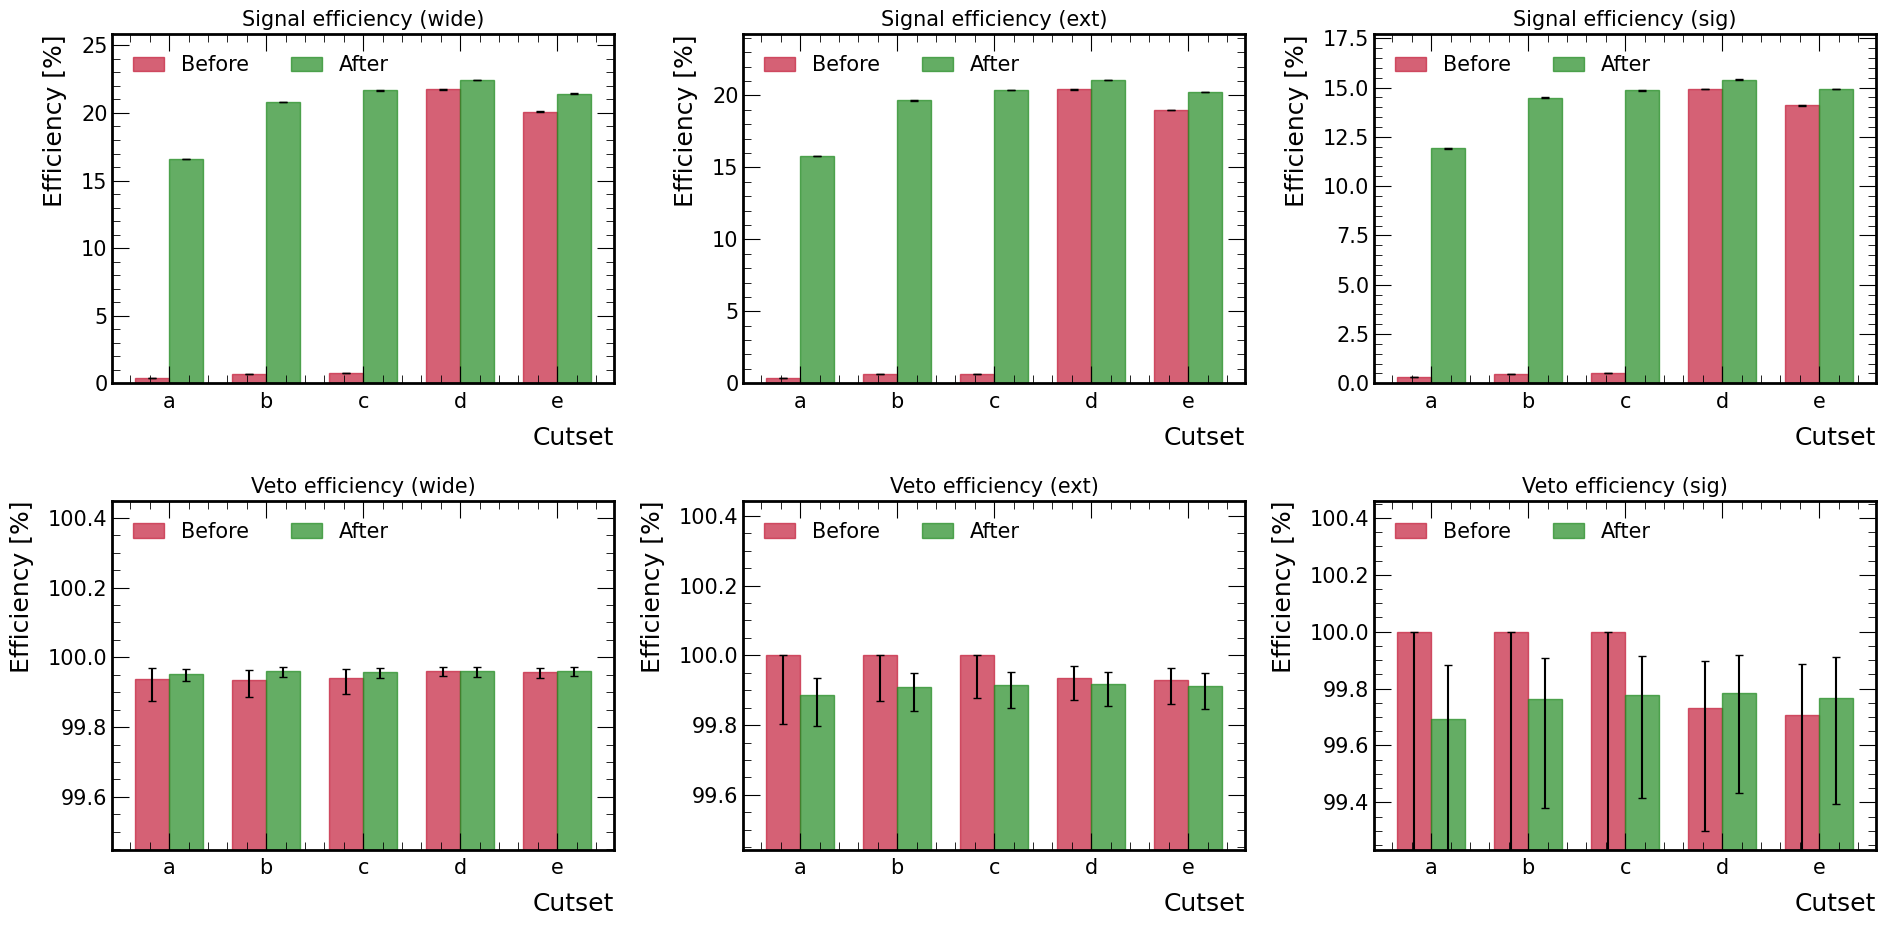

In [7]:
# import matplotlib.pyplot as plt
# import numpy as np
# from pyutils.pyplot import Plot

# def plot_efficiency_comparison(results, cutsets=None, figsize=(6.4*3, 4.8*2), save_path=None):
#     """
#     Plot efficiency comparison directly from results DataFrames.
    
#     Parameters:
#     -----------
#     results : dict
#         Nested dictionary with structure: results[period][analysis_name]["analysis"] = DataFrame
#     cutsets : list, optional
#         List of cutset identifiers to include (e.g., ["SU2020a", "SU2020b", ...])
#         If None, will extract from analysis names
#     figsize : tuple
#         Figure size (width, height)
#     save_path : str, optional
#         Path to save the figure
#     """
    
#     plotter = Plot()
#     fig, axes = plt.subplots(2, 3, figsize=figsize)
    
#     windows = ["wide", "ext", "sig"]
#     periods = list(results.keys())  # e.g., ["Before", "After"]
    
#     # Colors for before/after
#     colors = {"Before": "#C41E3A", "After": "#228B22"}
    
#     # If cutsets not provided, extract from analysis names
#     if cutsets is None:
#         cutsets = set()
#         for period in periods:
#             for analysis_name in results[period].keys():
#                 # Extract cutset from analysis name (assuming format like "SU2020a_...")
#                 cutset = analysis_name.split("_")[0]
#                 cutsets.add(cutset)
#         cutsets = sorted(list(cutsets))
    
#     width = 0.35
    
#     # Plot signal efficiencies (top row)
#     for col, window in enumerate(windows):
#         ax = axes[0, col]
        
#         # Collect data for this window
#         data_by_period = {period: {"cutsets": [], "effs": [], "errs": []} for period in periods}
        
#         for period in periods:
#             for analysis_name, analysis_data in results[period].items():
#                 if "signal" in analysis_name.lower():
#                     # Extract cutset from analysis name
#                     cutset = analysis_name.split("_")[0]
#                     if cutset in cutsets:
#                         df = analysis_data["analysis"]
                        
#                         try:
#                             # Extract efficiency and errors from DataFrame
#                             col_name = f"CE-like ({window})"
#                             if col_name in df.columns:
#                                 eff = float(df.at[2, col_name])  # Row 2: Eff [%]
#                                 err_low = abs(float(df.at[3, col_name]))  # Row 3: Eff Err− [%]
#                                 err_hi = float(df.at[4, col_name])  # Row 4: Eff Err+ [%]
                                
#                                 data_by_period[period]["cutsets"].append(cutset)
#                                 data_by_period[period]["effs"].append(eff)
#                                 data_by_period[period]["errs"].append([err_low, err_hi])
#                         except (KeyError, ValueError, IndexError) as e:
#                             print(f"Warning: Could not extract signal data for {analysis_name}, {window}: {e}")
        
#         # Plot the data
#         if any(data_by_period[period]["effs"] for period in periods):
#             # Find common cutsets
#             common_cutsets = set(data_by_period[periods[0]]["cutsets"])
#             for period in periods[1:]:
#                 common_cutsets &= set(data_by_period[period]["cutsets"])
#             common_cutsets = sorted(list(common_cutsets))
            
#             if common_cutsets:
#                 x = np.arange(len(common_cutsets))
                
#                 for i, period in enumerate(periods):
#                     # Reorder data to match common_cutsets
#                     effs = []
#                     errs = []
#                     for cutset in common_cutsets:
#                         idx = data_by_period[period]["cutsets"].index(cutset)
#                         effs.append(data_by_period[period]["effs"][idx])
#                         errs.append(data_by_period[period]["errs"][idx])
                    
#                     errs = np.array(errs).T
#                     offset = (i - len(periods)/2 + 0.5) * width
                    
#                     ax.bar(x + offset, effs, width, yerr=errs, capsize=3,
#                            color=colors[period], alpha=0.7, edgecolor=colors[period], 
#                            label=period)
                
#                 ax.set_xticks(x)
#                 ax.set_xticklabels([cutset.replace("SU2020", "") for cutset in common_cutsets])
#                 ax.set_ylim(0, max([max(data_by_period[p]["effs"]) for p in periods if data_by_period[p]["effs"]]) * 1.15)
#             else:
#                 ax.text(0.5, 0.5, "No common signal data", ha="center", va="center", transform=ax.transAxes)
#         else:
#             ax.text(0.5, 0.5, "No signal data available", ha="center", va="center", transform=ax.transAxes)
        
#         ax.set_ylabel("Efficiency [%]")
#         ax.set_xlabel("Cutset")
#         ax.set_title(f"Signal efficiency ({window})")
#         ax.legend(loc="upper left", ncols=len(periods))
    
#     # Plot veto efficiencies (bottom row)
#     for col, window in enumerate(windows):
#         ax = axes[1, col]
        
#         # Collect data for this window
#         data_by_period = {period: {"cutsets": [], "effs": [], "errs": []} for period in periods}
        
#         for period in periods:
#             for analysis_name, analysis_data in results[period].items():
#                 if "CRY" in analysis_name or "veto" in analysis_name.lower():
#                     # Extract cutset from analysis name
#                     cutset = analysis_name.split("_")[0]
#                     if cutset in cutsets:
#                         df = analysis_data["analysis"]
                        
#                         try:
#                             # Extract efficiency and errors from DataFrame
#                             col_name = f"No veto ({window})"
#                             if col_name in df.columns:
#                                 eff = float(df.at[2, col_name])  # Row 2: Eff [%]
#                                 err_low = abs(float(df.at[3, col_name]))  # Row 3: Eff Err− [%]
#                                 err_hi = float(df.at[4, col_name])  # Row 4: Eff Err+ [%]
                                
#                                 data_by_period[period]["cutsets"].append(cutset)
#                                 data_by_period[period]["effs"].append(eff)
#                                 data_by_period[period]["errs"].append([err_low, err_hi])
#                         except (KeyError, ValueError, IndexError) as e:
#                             print(f"Warning: Could not extract veto data for {analysis_name}, {window}: {e}")
        
#         # Plot the data
#         if any(data_by_period[period]["effs"] for period in periods):
#             # Find common cutsets
#             common_cutsets = set(data_by_period[periods[0]]["cutsets"])
#             for period in periods[1:]:
#                 common_cutsets &= set(data_by_period[period]["cutsets"])
#             common_cutsets = sorted(list(common_cutsets))
            
#             if common_cutsets:
#                 x = np.arange(len(common_cutsets))
                
#                 for i, period in enumerate(periods):
#                     # Reorder data to match common_cutsets
#                     effs = []
#                     errs = []
#                     for cutset in common_cutsets:
#                         idx = data_by_period[period]["cutsets"].index(cutset)
#                         effs.append(data_by_period[period]["effs"][idx])
#                         errs.append(data_by_period[period]["errs"][idx])
                    
#                     errs = np.array(errs).T
#                     offset = (i - len(periods)/2 + 0.5) * width
                    
#                     ax.bar(x + offset, effs, width, yerr=errs, capsize=3,
#                            color=colors[period], alpha=0.7, edgecolor=colors[period], 
#                            label=period)
                
#                 ax.set_xticks(x)
#                 ax.set_xticklabels([cutset.replace("SU2020", "") for cutset in common_cutsets])
                
#                 # Set y-axis limits for veto efficiency - FIXED VERSION
#                 all_effs = [eff for period in periods for eff in data_by_period[period]["effs"]]
#                 if all_effs:
#                     veto_min, veto_max = min(all_effs), max(all_effs)
                    
#                     # For high efficiency values (>90%), use a more reasonable range
#                     if veto_min > 90:
#                         # Calculate a reasonable range around the data
#                         range_span = veto_max - veto_min
#                         if range_span < 1:  # If difference is less than 1%
#                             # Use a fixed range around the data for better visibility
#                             center = (veto_min + veto_max) / 2
#                             half_range = max(0.5, range_span * 2)  # At least 1% total range
#                             ax.set_ylim(center - half_range, center + half_range)
#                         else:
#                             # Use the data range with small padding
#                             padding = range_span * 0.01
#                             ax.set_ylim(veto_min - padding, veto_max + padding)
#                     else:
#                         # For lower efficiency values, use standard scaling
#                         ax.set_ylim(veto_min * 0.99, veto_max * 1.01)
#             else:
#                 ax.text(0.5, 0.5, "No common veto data", ha="center", va="center", transform=ax.transAxes)
#         else:
#             ax.text(0.5, 0.5, "No veto data available", ha="center", va="center", transform=ax.transAxes)
        
#         ax.set_ylabel("Efficiency [%]")
#         ax.set_xlabel("Cutset")
#         ax.set_title(f"Veto efficiency ({window})")
#         ax.legend(loc="upper left", ncols=len(periods))
    
#     plt.tight_layout()
    
#     if save_path:
#         plt.savefig(save_path, dpi=300)
#         print(f"Wrote {save_path}")
    
#     plt.show()

# # Usage:
# plot_efficiency_comparison(
#     results, 
#     cutsets=["SU2020a", "SU2020b", "SU2020c", "SU2020d", "SU2020e"],
#     save_path="../../output/images/comp/bo_eff_comp_aw_before_after_abcde_2x3.png"
# )

In [8]:
# from pyutils.pylogger import Logger
# logger = Logger()
# # Efficiencies 
# def get_eff(results):
#     """
#     Extract efficiency data from the nested results dictionary.
#     Returns nested dictionaries with the same structure as results.
#     """
#     sig_eff_dict, veto_eff_dict = {}, {}
#     # eff_dict = {}
    
#     # Iterate through top-level keys (e.g., "SU2020c", "SU2020d")
#     for key in results.keys():

#         # eff_dict[key] = {}
#         sig_eff_dict[key] = {}
#         veto_eff_dict[key] = {}
        
#         # Iterate through analysis labels for this key
#         for ana_label in results[key].keys():

#             print(key, ana_label)
#             analysis = results[key][ana_label]["analysis"]

#             print(50*"=")

#             # display(analysis)
            
#             try:
        
#                 if "signal" in ana_label:
#                     print(f"Processing signal: {ana_label}")

#                     try:
                    
#                         sig_eff          = float(analysis.at[2, "CE-like (wide)"])
#                         sig_eff_err_low  = abs(float(analysis.at[3, "CE-like (wide)"]))
#                         sig_eff_err_hi   = float(analysis.at[4, "CE-like (wide)"])
#                         sig_eff_err      = np.array([sig_eff_err_low, sig_eff_err_hi])
                        
#                         sig_eff_dict[key][ana_label] = {
#                             "sig_eff": sig_eff,
#                             "sig_eff_err": sig_eff_err
#                         }

#                     except: 

#                         try: 
#                             sig_eff          = float(analysis.iloc[0, 3])
#                             sig_eff_err_low  = abs(float(analysis.iloc[0, 4]))
#                             sig_eff_err_hi   = float(analysis.iloc[0, 5])
#                             sig_eff_err      = np.array([sig_eff_err_low, sig_eff_err_hi])
                            
#                             sig_eff_dict[key][ana_label] = {
#                                 "sig_eff": sig_eff,
#                                 "sig_eff_err": sig_eff_err
#                             }

#                         except Exception as e: 
#                             logger.log(f"Failed: {e}", "error")
                        
#                 elif "CRY" in ana_label:     
#                     print(f"Processing CRY: {ana_label}")

#                     try: 
#                         veto_eff         = float(analysis.at[2, "No veto (wide)"])
#                         veto_eff_err_low = abs(float(analysis.at[3, "No veto (wide)"]))
#                         veto_eff_err_hi  = float(analysis.at[4, "No veto (wide)"])
#                         veto_eff_err     = np.array([veto_eff_err_low, veto_eff_err_hi])
                
#                         veto_eff_dict[key][ana_label] = {
#                             "veto_eff": veto_eff,
#                             "veto_eff_err": veto_eff_err
#                         }

#                     except: 
#                         veto_eff         = float(analysis.iloc[3, 3])
#                         veto_eff_err_low = abs(float(analysis.iloc[3, 4]))
#                         veto_eff_err_hi  = float(analysis.iloc[3, 5])
#                         veto_eff_err     = np.array([veto_eff_err_low, veto_eff_err_hi])
                
#                         veto_eff_dict[key][ana_label] = {
#                             "veto_eff": veto_eff,
#                             "veto_eff_err": veto_eff_err
#                         }

                        
#                 logger.log("Success", "success")
                    
#             except Exception as e:
#                 logger.log(f"Failed: {e}", "error")
                  
#             print(50*"=")

#             # break
    
#     return sig_eff_dict, veto_eff_dict

# sig_eff_dict, veto_eff_dict = get_eff(results)

In [9]:
results["After"]["SU2020a_signal_onspill-LH_aw"]["analysis"]

,Type,CE-like (wide),CE-like (ext),CE-like (sig),No veto (wide),No veto (ext),No veto (sig)
0,k,663602,631500,476532,0,0,0
1,N,4000000,4000000,4000000,663602,631500,476532
2,Eff [%],16.59005,15.7875,11.9133,100.0,100.0,100.0
3,Eff Err$-$ [%],-0.018591,-0.018223,-0.016188,-0.000151,-0.000158,-0.00021
4,Eff Err$+$ [%],0.018608,0.01824,0.016207,0.0,0.0,0.0
5,Rate 1B [$\text{day}^{-1}$],663602.0,631500.0,476532.0,0.0,0.0,0.0
6,Rate 1B Err$-$ [$\text{day}^{-1}$],-810.106476,-790.269066,-686.490621,0.0,0.0,0.0
7,Rate 1B Err$+$ [$\text{day}^{-1}$],811.099717,791.262322,687.483973,1.139434,1.139434,1.139434
8,Rate 2B [$\text{day}^{-1}$],663602.0,631500.0,476532.0,0.0,0.0,0.0
9,Rate 2B Err$-$ [$\text{day}^{-1}$],-810.106476,-790.269066,-686.490621,0.0,0.0,0.0


In [10]:
# from pyutils.pylogger import Logger
# import numpy as np

# logger = Logger()

# def get_eff(results):
#     """
#     Extract efficiency data from the nested results dictionary.
#     Returns nested dictionaries with the same structure as results.
#     Accumulates data for all windows (wide, ext, sig).
#     """
#     sig_eff_dict, veto_eff_dict = {}, {}
    
#     # Iterate through top-level keys (e.g., "SU2020c", "SU2020d")
#     for key in results.keys():
#         sig_eff_dict[key] = {}
#         veto_eff_dict[key] = {}
        
#         # Iterate through analysis labels for this key
#         for ana_label in results[key].keys():
#             print(key, ana_label)
#             analysis = results[key][ana_label]["analysis"]

#             print(50*"=")

#             # Initialize dictionaries for this analysis
#             sig_eff_dict[key][ana_label] = {}
#             veto_eff_dict[key][ana_label] = {}

#             # Process all windows
#             for window in ["wide", "ext", "sig"]:
#                 print(window)
                
#                 try:
#                     if "signal" in ana_label:
#                         print(f"Processing signal: {ana_label}")
                        
#                         # Debug: Print analysis structure
#                         print(f"Analysis shape: {analysis.shape}")
#                         print(f"Analysis columns: {list(analysis.columns)}")
#                         print(f"Analysis index: {list(analysis.index)}")
#                         print(f"Looking for column: CE-like ({window})")
                        
#                         # Check if the column exists
#                         expected_col = f"CE-like ({window})"
#                         if expected_col not in analysis.columns:
#                             print(f"Column "{expected_col}" not found!")
#                             print(f"Available columns: {list(analysis.columns)}")
#                             continue
    
#                         try:
#                             print(f"Attempting method 1: analysis.at[2, "{expected_col}"]")
#                             sig_eff          = float(analysis.at[2, expected_col])
#                             sig_eff_err_low  = abs(float(analysis.at[3, expected_col]))
#                             sig_eff_err_hi   = float(analysis.at[4, expected_col])
#                             sig_eff_err      = np.array([sig_eff_err_low, sig_eff_err_hi])
                            
#                             # Append to existing dictionary instead of overwriting
#                             sig_eff_dict[key][ana_label][f"sig_eff_{window}"] = sig_eff
#                             sig_eff_dict[key][ana_label][f"sig_eff_err_{window}"] = sig_eff_err
#                             print(f"Method 1 succeeded: sig_eff={sig_eff}")
    
#                         except Exception as e1: 
#                             print(f"Method 1 failed: {e1}")
#                             try: 
#                                 print(f"Attempting method 2: analysis.iloc[0, 3]")
#                                 sig_eff          = float(analysis.iloc[0, 3])
#                                 sig_eff_err_low  = abs(float(analysis.iloc[0, 4]))
#                                 sig_eff_err_hi   = float(analysis.iloc[0, 5])
#                                 sig_eff_err      = np.array([sig_eff_err_low, sig_eff_err_hi])
                                
#                                 # Append to existing dictionary instead of overwriting
#                                 sig_eff_dict[key][ana_label][f"sig_eff_{window}"] = sig_eff
#                                 sig_eff_dict[key][ana_label][f"sig_eff_err_{window}"] = sig_eff_err
#                                 print(f"Method 2 succeeded: sig_eff={sig_eff}")
    
#                             except Exception as e2: 
#                                 print(f"Method 2 also failed: {e2}")
#                                 # Print the first few rows and columns for debugging
#                                 print("First few rows of analysis:")
#                                 print(analysis.head())
#                                 logger.log(f"Both methods failed for {window}. Method 1: {e1}, Method 2: {e2}", "error")
                            
#                     elif "CRY" in ana_label:     
#                         print(f"Processing CRY: {ana_label}")
    
#                         try: 
#                             veto_eff         = float(analysis.at[2, f"No veto ({window})"])
#                             veto_eff_err_low = abs(float(analysis.at[3, f"No veto ({window})"]))
#                             veto_eff_err_hi  = float(analysis.at[4, f"No veto ({window})"])
#                             veto_eff_err     = np.array([veto_eff_err_low, veto_eff_err_hi])
                    
#                             # Append to existing dictionary instead of overwriting
#                             veto_eff_dict[key][ana_label][f"veto_eff_{window}"] = veto_eff
#                             veto_eff_dict[key][ana_label][f"veto_eff_err_{window}"] = veto_eff_err
    
#                         except: 
#                             try:
#                                 veto_eff         = float(analysis.iloc[3, 3])
#                                 veto_eff_err_low = abs(float(analysis.iloc[3, 4]))
#                                 veto_eff_err_hi  = float(analysis.iloc[3, 5])
#                                 veto_eff_err     = np.array([veto_eff_err_low, veto_eff_err_hi])
                        
#                                 # Append to existing dictionary instead of overwriting
#                                 veto_eff_dict[key][ana_label][f"veto_eff_{window}"] = veto_eff
#                                 veto_eff_dict[key][ana_label][f"veto_eff_err_{window}"] = veto_eff_err
                            
#                             except Exception as e:
#                                 logger.log(f"Failed for {window}: {e}", "error")

#                     logger.log(f"Success for {window}", "success")
                        
#                 except Exception as e:
#                     logger.log(f"Failed for {window}: {e}", "error")
                  
#             print(50*"=")
#             break  # Remove this if you want to process all analysis labels, not just the first one
    
#     return sig_eff_dict, veto_eff_dict

# # Usage
# sig_eff_dict, veto_eff_dict = get_eff(results)

In [11]:
from pyutils.pylogger import Logger
import numpy as np

logger = Logger()

def get_eff(results):
    """
    Extract efficiency data from the nested results dictionary.
    Returns nested dictionaries with the same structure as results.
    Accumulates data for all windows (wide, ext, sig).
    """
    sig_eff_dict, veto_eff_dict = {}, {}
    
    # Iterate through top-level keys (e.g., "SU2020c", "SU2020d")
    for key in results.keys():
        

        sig_eff_dict[key] = {}
        veto_eff_dict[key] = {}
        
        # Iterate through analysis labels for this key
        for ana_label in results[key].keys():
            print(key, ana_label)
            analysis = results[key][ana_label]["analysis"]



            print(50*"=")

            # Initialize dictionaries for this analysis
            sig_eff_dict[key][ana_label] = {}
            veto_eff_dict[key][ana_label] = {}

            # Process all windows
            for window in ["wide", "ext", "sig"]:
                logger.log(f"Getting efficiency for {window} window", "info")
                
                try:
                    if "signal" in ana_label:
                        print(f"Processing signal: {ana_label}")
    
                        try:
                            sig_eff          = float(analysis.at[2, f"CE-like ({window})"])
                            sig_eff_err_low  = abs(float(analysis.at[3, f"CE-like ({window})"]))
                            sig_eff_err_hi   = float(analysis.at[4, f"CE-like ({window})"])
                            sig_eff_err      = np.array([sig_eff_err_low, sig_eff_err_hi])
                            
                            # Append to existing dictionary instead of overwriting
                            sig_eff_dict[key][ana_label][f"sig_eff_{window}"] = sig_eff
                            sig_eff_dict[key][ana_label][f"sig_eff_err_{window}"] = sig_eff_err
    
                        except: 
                            
                            try: 
                                sig_eff          = float(analysis.iloc[0, 3])
                                sig_eff_err_low  = abs(float(analysis.iloc[0, 4]))
                                sig_eff_err_hi   = float(analysis.iloc[0, 5])
                                sig_eff_err      = np.array([sig_eff_err_low, sig_eff_err_hi])
                                
                                # Append to existing dictionary instead of overwriting
                                sig_eff_dict[key][ana_label][f"sig_eff_{window}"] = sig_eff
                                sig_eff_dict[key][ana_label][f"sig_eff_err_{window}"] = sig_eff_err
    
                            except Exception as e: 
                                logger.log(f"Failed for {window}: {e}", "error")
                            
                    elif "CRY" in ana_label:     
                        print(f"Processing CRY: {ana_label}")
    
                        try: 
                            veto_eff         = float(analysis.at[2, f"No veto ({window})"])
                            veto_eff_err_low = abs(float(analysis.at[3, f"No veto ({window})"]))
                            veto_eff_err_hi  = float(analysis.at[4, f"No veto ({window})"])
                            veto_eff_err     = np.array([veto_eff_err_low, veto_eff_err_hi])
                    
                            # Append to existing dictionary instead of overwriting
                            veto_eff_dict[key][ana_label][f"veto_eff_{window}"] = veto_eff
                            veto_eff_dict[key][ana_label][f"veto_eff_err_{window}"] = veto_eff_err
    
                        except: 
                            try:
                                veto_eff         = float(analysis.iloc[3, 3])
                                veto_eff_err_low = abs(float(analysis.iloc[3, 4]))
                                veto_eff_err_hi  = float(analysis.iloc[3, 5])
                                veto_eff_err     = np.array([veto_eff_err_low, veto_eff_err_hi])
                        
                                # Append to existing dictionary instead of overwriting
                                veto_eff_dict[key][ana_label][f"veto_eff_{window}"] = veto_eff
                                veto_eff_dict[key][ana_label][f"veto_eff_err_{window}"] = veto_eff_err
                            
                            except Exception as e:
                                logger.log(f"Failed for {window}: {e}", "error")

                    logger.log(f"Success for {window}", "success")
                        
                except Exception as e:
                    logger.log(f"Failed for {window}: {e}", "error")
                  
            print(50*"=")

            # break
    
    return sig_eff_dict, veto_eff_dict

# Usage
sig_eff_dict, veto_eff_dict = get_eff(results)

# print(sig_eff_dict, veto_eff_dict)

Before SU2020a_CRY_onspill-LH_aw_bug
[pylogger] ⭐️ Getting efficiency for wide window
Processing CRY: SU2020a_CRY_onspill-LH_aw_bug
[pylogger] ✅ Success for wide
[pylogger] ⭐️ Getting efficiency for ext window
Processing CRY: SU2020a_CRY_onspill-LH_aw_bug
[pylogger] ✅ Success for ext
[pylogger] ⭐️ Getting efficiency for sig window
Processing CRY: SU2020a_CRY_onspill-LH_aw_bug
[pylogger] ✅ Success for sig
Before SU2020a_signal_onspill-LH_aw_bug
[pylogger] ⭐️ Getting efficiency for wide window
Processing signal: SU2020a_signal_onspill-LH_aw_bug
[pylogger] ✅ Success for wide
[pylogger] ⭐️ Getting efficiency for ext window
Processing signal: SU2020a_signal_onspill-LH_aw_bug
[pylogger] ✅ Success for ext
[pylogger] ⭐️ Getting efficiency for sig window
Processing signal: SU2020a_signal_onspill-LH_aw_bug
[pylogger] ✅ Success for sig
Before SU2020b_CRY_onspill-LH_aw_bug
[pylogger] ⭐️ Getting efficiency for wide window
Processing CRY: SU2020b_CRY_onspill-LH_aw_bug
[pylogger] ✅ Success for wide
[

In [12]:
sig_eff_dict

{'Before': {'SU2020a_CRY_onspill-LH_aw_bug': {},
  'SU2020a_signal_onspill-LH_aw_bug': {'sig_eff_wide': 0.4046,
   'sig_eff_err_wide': array([0.00316159, 0.00318639]),
   'sig_eff_ext': 0.376925,
   'sig_eff_err_ext': array([0.00305154, 0.00307635]),
   'sig_eff_sig': 0.29815,
   'sig_eff_err_sig': array([0.00271369, 0.00273854])},
  'SU2020b_CRY_onspill-LH_aw_bug': {},
  'SU2020b_signal_onspill-LH_aw_bug': {'sig_eff_wide': 0.6728999999999999,
   'sig_eff_err_wide': array([0.00407539, 0.00410005]),
   'sig_eff_ext': 0.615275,
   'sig_eff_err_ext': array([0.00389756, 0.00392225]),
   'sig_eff_sig': 0.47985,
   'sig_eff_err_sig': array([0.00344288, 0.00346764])},
  'SU2020c_CRY_onspill-LH_aw_bug': {},
  'SU2020c_signal_onspill-LH_aw_bug': {'sig_eff_wide': 0.7424499999999999,
   'sig_eff_err_wide': array([0.00427996, 0.00430459]),
   'sig_eff_ext': 0.672725,
   'sig_eff_err_ext': array([0.00407486, 0.00409952]),
   'sig_eff_sig': 0.51675,
   'sig_eff_err_sig': array([0.00357262, 0.0035973

In [13]:
# import matplotlib.pyplot as plt
# import numpy as np
# from pyutils.pyplot import Plot

# plotter = Plot()
# fig, axes = plt.subplots(2, 3, figsize=(6.4*3, 4.8*2))

# # Signal efficiency plot
# cutsets = ["SU2020a", "SU2020b", "SU2020c", "SU2020d", "SU2020e"]
# windows = ["wide", "ext", "sig"]

# x = np.arange(len(cutsets))
# width = 0.35

# # Plot signal efficiencies for each window
# for col, window in enumerate(windows):
#     ax = axes[0, col]
    
#     # Extract data for all cutsets
#     before_sig_effs = []
#     after_sig_effs = []
#     before_sig_errs = []
#     after_sig_errs = []

#     for cutset in cutsets:
#         # Find matching keys for before and after
#         before_key = None
#         after_key = None
        
#         for key in sig_eff_dict["Before"].keys():
#             if cutset in key:
#                 before_key = key
#                 break
        
#         for key in sig_eff_dict["After"].keys():
#             if cutset in key:
#                 after_key = key
#                 break
        
#         if before_key and after_key:
#             before_sig_effs.append(sig_eff_dict["Before"][before_key][f"sig_eff_{window}"])
#             after_sig_effs.append(sig_eff_dict["After"][after_key][f"sig_eff_{window}"])
            
#             before_sig_errs.append([sig_eff_dict["Before"][before_key][f"sig_eff_err_{window}"][0],
#                                    sig_eff_dict["Before"][before_key][f"sig_eff_err_{window}"][1]])
#             after_sig_errs.append([sig_eff_dict["After"][after_key][f"sig_eff_err_{window}"][0],
#                                   sig_eff_dict["After"][after_key][f"sig_eff_err_{window}"][1]])

#     before_sig_errs = np.array(before_sig_errs).T
#     after_sig_errs = np.array(after_sig_errs).T

#     # Plot side-by-side bars
#     ax.bar(x - width/2, before_sig_effs, width, yerr=before_sig_errs, capsize=3,
#            color="#C41E3A", alpha=0.7, edgecolor="#C41E3A", label="Before")
#     ax.bar(x + width/2, after_sig_effs, width, yerr=after_sig_errs, capsize=3,
#            color="#228B22", alpha=0.7, edgecolor="#228B22", label="After")

#     ax.set_xticks(x)
#     ax.set_xticklabels([cutset.replace("SU2020", "") for cutset in cutsets])
#     ax.set_ylabel("Efficiency [%]")
#     ax.set_title(f"Signal efficiency ({window})")
#     ax.legend(loc="upper left", ncols=2)
#     ax.set_ylim(0, max(max(before_sig_effs), max(after_sig_effs)) * 1.15)
#     ax.set_xlabel("Cutset")

# # Plot veto efficiencies for each window
# for col, window in enumerate(windows):
#     ax = axes[1, col]
    
#     # Extract data for all cutsets
#     before_veto_effs = []
#     after_veto_effs = []
#     before_veto_errs = []
#     after_veto_errs = []
#     valid_cutsets = []

#     for cutset in cutsets:
#         # Find matching keys for before and after
#         before_key = None
#         after_key = None
        
#         for key in veto_eff_dict["Before"].keys():
#             if cutset in key and f"veto_eff_{window}" in veto_eff_dict["Before"][key]:
#                 before_key = key
#                 break
        
#         for key in veto_eff_dict["After"].keys():
#             if cutset in key and f"veto_eff_{window}" in veto_eff_dict["After"][key]:
#                 after_key = key
#                 break
        
#         # Only add data if both before and after have the required veto data
#         if (before_key and after_key and 
#             f"veto_eff_{window}" in veto_eff_dict["Before"][before_key] and
#             f"veto_eff_{window}" in veto_eff_dict["After"][after_key]):
            
#             before_veto_effs.append(veto_eff_dict["Before"][before_key][f"veto_eff_{window}"])
#             after_veto_effs.append(veto_eff_dict["After"][after_key][f"veto_eff_{window}"])
            
#             before_veto_errs.append([veto_eff_dict["Before"][before_key][f"veto_eff_err_{window}"][0],
#                                     veto_eff_dict["Before"][before_key][f"veto_eff_err_{window}"][1]])
#             after_veto_errs.append([veto_eff_dict["After"][after_key][f"veto_eff_err_{window}"][0],
#                                    veto_eff_dict["After"][after_key][f"veto_eff_err_{window}"][1]])
#             valid_cutsets.append(cutset)

#     # Only plot if we have data
#     if before_veto_effs and after_veto_effs:
#         x_valid = np.arange(len(valid_cutsets))
#         before_veto_errs = np.array(before_veto_errs).T
#         after_veto_errs = np.array(after_veto_errs).T

#         # Plot side-by-side bars
#         ax.bar(x_valid - width/2, before_veto_effs, width, yerr=before_veto_errs, capsize=3,
#                color="#C41E3A", alpha=0.7, edgecolor="#C41E3A", label="Before")
#         ax.bar(x_valid + width/2, after_veto_effs, width, yerr=after_veto_errs, capsize=3,
#                color="#228B22", alpha=0.7, edgecolor="#228B22", label="After")

#         ax.set_xticks(x_valid)
#         ax.set_xticklabels([cutset.replace("SU2020", "") for cutset in valid_cutsets])
        
#         # Set y-axis limits for veto efficiency
#         veto_min = min(min(before_veto_effs), min(after_veto_effs))
#         veto_max = max(max(before_veto_effs), max(after_veto_effs))
#         ax.set_ylim(veto_min * 0.9992, veto_max * 1.0003)
#     else:
#         # No veto data available
#         ax.text(0.5, 0.5, "No veto data available", 
#                 horizontalalignment="center", verticalalignment="center", 
#                 transform=ax.transAxes, fontsize=12)
#         ax.set_xticks([])

#     ax.set_ylabel("Efficiency [%]")
#     ax.set_xlabel("Cutset")
#     ax.set_title(f"Veto efficiency ({window})")
#     ax.legend(loc="upper left", ncols=2)

# plt.tight_layout()
# out_path = "../../output/images/comp/bo_eff_comp_aw_before_after_abcde_2x3.png"
# plt.savefig(out_path, dpi=300)
# print(f"Wrote {out_path}")
# plt.show()

[pyplot] ⭐️ Initialised Plot with mu2e.mplstyle and verbosity = 1


KeyError: 'sig_eff_wide'

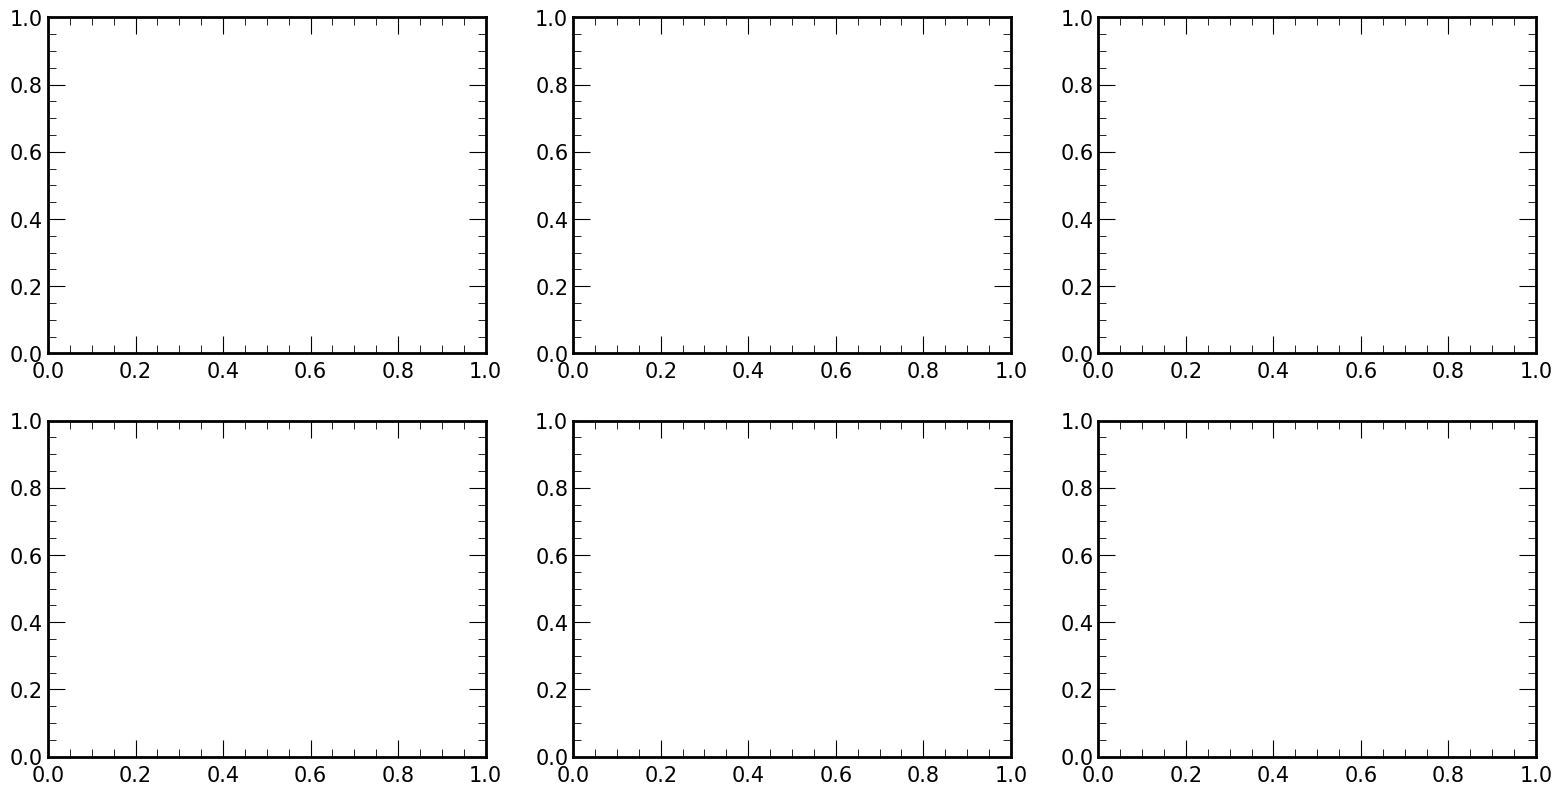

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from pyutils.pyplot import Plot

plotter = Plot()
fig, axes = plt.subplots(2, 3, figsize=(6.4*3, 4.8*2))

# Signal efficiency plot
cutsets = ["SU2020a", "SU2020b", "SU2020c", "SU2020d", "SU2020e"]
windows = ["wide", "ext", "sig"]

x = np.arange(len(cutsets))
width = 0.35

# Plot signal efficiencies for each window
for col, window in enumerate(windows):
    ax = axes[0, col]
    
    # Extract data for all cutsets
    before_sig_effs = []
    after_sig_effs = []
    before_sig_errs = []
    after_sig_errs = []

    for cutset in cutsets:
        # Find matching keys for before and after
        before_key = None
        after_key = None
        
        for key in sig_eff_dict["Before"].keys():
            if cutset in key:
                before_key = key
                break
        
        for key in sig_eff_dict["After"].keys():
            if cutset in key:
                after_key = key
                break
        
        if before_key and after_key:
            before_sig_effs.append(sig_eff_dict["Before"][before_key][f"sig_eff_{window}"])
            after_sig_effs.append(sig_eff_dict["After"][after_key][f"sig_eff_{window}"])
            
            before_sig_errs.append([sig_eff_dict["Before"][before_key][f"sig_eff_err_{window}"][0],
                                   sig_eff_dict["Before"][before_key][f"sig_eff_err_{window}"][1]])
            after_sig_errs.append([sig_eff_dict["After"][after_key][f"sig_eff_err_{window}"][0],
                                  sig_eff_dict["After"][after_key][f"sig_eff_err_{window}"][1]])

    before_sig_errs = np.array(before_sig_errs).T
    after_sig_errs = np.array(after_sig_errs).T

    # Plot side-by-side bars
    ax.bar(x - width/2, before_sig_effs, width, yerr=before_sig_errs, capsize=3,
           color="#C41E3A", alpha=0.7, edgecolor="#C41E3A", label="Before")
    ax.bar(x + width/2, after_sig_effs, width, yerr=after_sig_errs, capsize=3,
           color="#228B22", alpha=0.7, edgecolor="#228B22", label="After")

    ax.set_xticks(x)
    ax.set_xticklabels([cutset.replace("SU2020", "") for cutset in cutsets])
    ax.set_ylabel("Efficiency [%]")
    ax.set_title(f"Signal efficiency ({window})")
    ax.legend(loc="upper left", ncols=2)
    ax.set_ylim(0, max(max(before_sig_effs), max(after_sig_effs)) * 1.15)
    ax.set_xlabel("Cutset")

# Plot veto efficiencies for each window
for col, window in enumerate(windows):
    ax = axes[1, col]
    
    # Extract data for all cutsets
    before_veto_effs = []
    after_veto_effs = []
    before_veto_errs = []
    after_veto_errs = []

    for cutset in cutsets:
        # Find matching keys for before and after
        before_key = None
        after_key = None
        
        for key in veto_eff_dict["Before"].keys():
            if cutset in key:
                before_key = key
                break
        
        for key in veto_eff_dict["After"].keys():
            if cutset in key:
                after_key = key
                break
        
        if before_key and after_key:
            before_veto_effs.append(veto_eff_dict["Before"][before_key][f"veto_eff_{window}"])
            after_veto_effs.append(veto_eff_dict["After"][after_key][f"veto_eff_{window}"])
            
            before_veto_errs.append([veto_eff_dict["Before"][before_key][f"veto_eff_err_{window}"][0],
                                    veto_eff_dict["Before"][before_key][f"veto_eff_err_{window}"][1]])
            after_veto_errs.append([veto_eff_dict["After"][after_key][f"veto_eff_err_{window}"][0],
                                   veto_eff_dict["After"][after_key][f"veto_eff_err_{window}"][1]])

    before_veto_errs = np.array(before_veto_errs).T
    after_veto_errs = np.array(after_veto_errs).T

    # Plot side-by-side bars
    ax.bar(x - width/2, before_veto_effs, width, yerr=before_veto_errs, capsize=3,
           color="#C41E3A", alpha=0.7, edgecolor="#C41E3A", label="Before")
    ax.bar(x + width/2, after_veto_effs, width, yerr=after_veto_errs, capsize=3,
           color="#228B22", alpha=0.7, edgecolor="#228B22", label="After")

    ax.set_xticks(x)
    ax.set_xticklabels([cutset.replace("SU2020", "") for cutset in cutsets])
    ax.set_ylabel("Efficiency [%]")
    ax.set_xlabel("Cutset")
    ax.set_title(f"Veto efficiency ({window})")
    ax.legend(loc="upper left", ncols=2)

    # Set y-axis limits for veto efficiency
    veto_min = min(min(before_veto_effs), min(after_veto_effs))
    veto_max = max(max(before_veto_effs), max(after_veto_effs))
    ax.set_ylim(veto_min * 0.9992, veto_max * 1.0003)

plt.tight_layout()
out_path = "../../output/images/comp/bo_eff_comp_aw_before_after_abcde_2x3.png"
plt.savefig(out_path, dpi=300)
print(f"Wrote {out_path}")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from pyutils.pyplot import Plot

plotter = Plot()
fig, (ax1, ax2) = plt.subplots(1, 4, figsize=(6.4*4, 4.8))

# Signal efficiency plot
cutsets = ["SU2020a", "SU2020b", "SU2020c", "SU2020d", "SU2020e"]
# colors = ["#2E74B5", "#CC8400", "#228B22", "#C41E3A", "#8A2BE2"]

x = np.arange(len(cutsets))
width = 0.35

# Extract data for all cutsets
before_sig_effs = []
after_sig_effs = []
before_sig_errs = []
after_sig_errs = []

for cutset in cutsets:
    # Find matching keys for before and after
    before_key = None
    after_key = None
    
    for key in sig_eff_dict["Before"].keys():
        if cutset in key:
            before_key = key
            break
    
    for key in sig_eff_dict["After"].keys():
        if cutset in key:
            after_key = key
            break
    
    if before_key and after_key:
        before_sig_effs.append(sig_eff_dict["Before"][before_key]["sig_eff"])
        after_sig_effs.append(sig_eff_dict["After"][after_key]["sig_eff"])
        
        before_sig_errs.append([sig_eff_dict["Before"][before_key]["sig_eff_err"][0],
                               sig_eff_dict["Before"][before_key]["sig_eff_err"][1]])
        after_sig_errs.append([sig_eff_dict["After"][after_key]["sig_eff_err"][0],
                              sig_eff_dict["After"][after_key]["sig_eff_err"][1]])

before_sig_errs = np.array(before_sig_errs).T
after_sig_errs = np.array(after_sig_errs).T
# "#2E74B5", "#CC8400"228B22
# Plot side-by-side bars
ax1.bar(x - width/2, before_sig_effs, width, yerr=before_sig_errs, capsize=3,
        color="#C41E3A", alpha=0.7, edgecolor="#C41E3A", label="Before")
ax1.bar(x + width/2, after_sig_effs, width, yerr=after_sig_errs, capsize=3,
        color="#228B22", alpha=0.7, edgecolor="#228B22", label="After")

ax1.set_xticks(x)
ax1.set_xticklabels(cutset.replace("SU2020", "") for cutset in cutsets)
ax1.set_ylabel("Efficiency [%]")
ax1.set_title("Signal efficiency")
ax1.legend(loc="upper left", ncols=2)
ax1.set_ylim(0, max(max(before_sig_effs), max(after_sig_effs)) * 1.15)
ax1.set_xlabel("Cutset")

# Veto efficiency plot
before_veto_effs = []
after_veto_effs = []
before_veto_errs = []
after_veto_errs = []

for cutset in cutsets:
    # Find matching keys for before and after
    before_key = None
    after_key = None
    
    for key in veto_eff_dict["Before"].keys():
        if cutset in key:
            before_key = key
            break
    
    for key in veto_eff_dict["After"].keys():
        if cutset in key:
            after_key = key
            break
    
    if before_key and after_key:
        before_veto_effs.append(veto_eff_dict["Before"][before_key]["veto_eff"])
        after_veto_effs.append(veto_eff_dict["After"][after_key]["veto_eff"])
        
        before_veto_errs.append([veto_eff_dict["Before"][before_key]["veto_eff_err"][0],
                                veto_eff_dict["Before"][before_key]["veto_eff_err"][1]])
        after_veto_errs.append([veto_eff_dict["After"][after_key]["veto_eff_err"][0],
                               veto_eff_dict["After"][after_key]["veto_eff_err"][1]])

before_veto_errs = np.array(before_veto_errs).T
after_veto_errs = np.array(after_veto_errs).T

# Plot side-by-side bars
ax2.bar(x - width/2, before_veto_effs, width, yerr=before_veto_errs, capsize=3,
        color="#C41E3A", alpha=0.7, edgecolor="#C41E3A", label="Before")
ax2.bar(x + width/2, after_veto_effs, width, yerr=after_veto_errs, capsize=3,
        color="#228B22", alpha=0.7, edgecolor="#228B22", label="After")

ax2.set_xticks(x)
ax2.set_xticklabels([cutset.replace("SU2020", "") for cutset in cutsets])
# ax2.set_ylabel("Efficiency [%]")
ax2.set_xlabel("Cutset")
# ax2.set_ylabel("Efficiency [%]")
ax2.set_title("Veto efficiency")
ax2.legend(loc="upper left", ncols=2)

# Set y-axis limits for veto efficiency
veto_min = min(min(before_veto_effs), min(after_veto_effs))
veto_max = max(max(before_veto_effs), max(after_veto_effs))
ax2.set_ylim(veto_min * 0.9992, veto_max * 1.0003)

plt.tight_layout()
out_path = "../../output/images/comp/bo_eff_comp_aw_before_after_abcde_1.png"
plt.savefig(out_path, dpi=300)
print(f"Wrote {out_path}")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from pyutils.pyplot import Plot

plotter = Plot()  # for style

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6.4*2, 4.8))

# Signal efficiency plot
sig_labels = ["Before", "After"]
cutsets = ["SU2020a", "SU2020b", "SU2020c", "SU2020d", "SU2020e"]
colors = ["#2E74B5", "#CC8400", "#228B22", "#C41E3A", "#8A2BE2"]

x = np.arange(len(sig_labels))
width = 0.15

for i, cutset in enumerate(cutsets):
    # Extract efficiency values for Before and After
    sig_effs = []
    sig_errs_lower = []
    sig_errs_upper = []
    
    for period in sig_labels:
        # Find the key that contains this cutset
        matching_key = None
        for key in sig_eff_dict[period].keys():
            if cutset in key:
                matching_key = key
                break
        
        if matching_key:
            sig_effs.append(sig_eff_dict[period][matching_key]["sig_eff"])
            sig_errs_lower.append(sig_eff_dict[period][matching_key]["sig_eff_err"][0])
            sig_errs_upper.append(sig_eff_dict[period][matching_key]["sig_eff_err"][1])
    
    # Create error bars array
    sig_errs = np.array([sig_errs_lower, sig_errs_upper])
    
    offset = (i - 1.5) * width  # Center the 4 bars around each x position
    ax1.bar(x + offset, sig_effs, width, yerr=sig_errs, capsize=3, 
            color=colors[i], alpha=0.7, edgecolor=colors[i], 
            label=cutset) # replace("SU2020", ""))

ax1.set_xticks(x)
ax1.set_xticklabels(sig_labels)
ax1.set_ylabel("Efficiency [%]")
ax1.set_title("Signal efficiency")
ax1.legend(ncols=2, loc="upper left")

plt.tight_layout()

# Set y-limits for signal efficiency
all_sig_effs = []
for period in sig_eff_dict.values():
    for data_point in period.values():
        all_sig_effs.append(data_point["sig_eff"])
ax1.set_ylim(0, max(all_sig_effs) * 1.5)
ax1.tick_params(axis="x", which="both", length=0)

# Veto efficiency plot
veto_labels = ["Before", "After"]  # Using the same structure as signal data

x = np.arange(len(veto_labels))

for i, cutset in enumerate(cutsets):
    # Extract efficiency values for Before and After
    veto_effs = []
    veto_errs_lower = []
    veto_errs_upper = []
    
    for period in veto_labels:
        # Find the key that contains this cutset
        matching_key = None
        for key in veto_eff_dict[period].keys():
            if cutset in key:
                matching_key = key
                break
        
        if matching_key:
            veto_effs.append(veto_eff_dict[period][matching_key]["veto_eff"])
            veto_errs_lower.append(veto_eff_dict[period][matching_key]["veto_eff_err"][0])
            veto_errs_upper.append(veto_eff_dict[period][matching_key]["veto_eff_err"][1])
    
    # Create error bars array
    veto_errs = np.array([veto_errs_lower, veto_errs_upper])
    
    offset = (i - 1.5) * width  # Center the 4 bars around each x position
    ax2.bar(x + offset, veto_effs, width, yerr=veto_errs, capsize=3, 
            color=colors[i], alpha=0.7, edgecolor=colors[i], 
            label=cutset) # replace("SU2020", ""))

ax2.set_xticks(x)
ax2.set_xticklabels(veto_labels)
ax2.set_ylabel("Efficiency [%]")
ax2.set_title("Veto efficiency")
# ax2.legend()  # Uncomment if you want legend on both plots

# Set y-axis limits for veto efficiency (they"re typically very high, around 99.9%)
all_veto_effs = []
for period in veto_eff_dict.values():
    for data_point in period.values():
        all_veto_effs.append(data_point["veto_eff"])

veto_min = min(all_veto_effs)
veto_max = max(all_veto_effs)
ax2.set_ylim(veto_min * 0.9992, veto_max * 1.0003)
ax2.tick_params(axis="x", which="both", length=0)

plt.tight_layout()

out_path = "../../output/images/comp/bo_eff_comp_aw_before_after_abcde_2.png"
plt.savefig(out_path, dpi=300)
print(f"Wrote {out_path}")
plt.show()

In [ ]:
# def get_optimal_cutset(sig_eff_dict, veto_eff_dict, veto_threshold=99.9, include_errors=True, out_path = None):
#     """
#     Find the cutset that maximises signal efficiency while maintaining veto efficiency above threshold
    
#     Args:
#         veto_threshold: minimum acceptable veto efficiency (default 99.9%)
#         include_errors: if True, check if veto_eff - error > threshold
#     """

#     report_str = "=== ANALYSIS ===\n"

#     logger.log(f"Maximising signal efficiency with veto efficiency >= {veto_threshold}%\n", "info")
    
#     valid_cutsets = {}
#     invalid_cutsets = {}
    
#     for cutset in ["SU2020a", "SU2020b", "SU2020c", "SU2020d", "SU2020e"]:

#         report_str += f"\n--- {cutset} ---\n"
        
#         # Signal efficiency stats
#         sig_effs = [data["sig_eff"] for data in sig_eff_dict[cutset].values()]
#         avg_sig_eff = np.mean(sig_effs)
#         sig_std = np.std(sig_effs)
        
#         # Veto efficiency stats  
#         veto_effs = [data["veto_eff"] for data in veto_eff_dict[cutset].values()]
#         avg_veto_eff = np.mean(veto_effs)
#         veto_std = np.std(veto_effs)
        
#         # Check if veto efficiency meets threshold
#         if include_errors:
#             # Fairly loose: require veto_eff + 1sigma error > threshold
#             min_veto_errors = [data["veto_eff"] - data["veto_eff_err"][0] 
#                               for data in veto_eff_dict[cutset].values()]
#             min_veto_with_error = min(min_veto_errors)
#             veto_passes = min_veto_with_error > veto_threshold
#             check_value = min_veto_with_error
#         else:
#             # Just check average
#             veto_passes = avg_veto_eff > veto_threshold  
#             check_value = avg_veto_eff
        
#         status = "GOOD" if veto_passes else "WARNING"

#         report_str += f"Status: {status}\n"
#         report_str += f"  Signal efficiency: {avg_sig_eff:.3f}% ± {sig_std:.3f}\n"
#         report_str += f"  Veto efficiency:   {avg_veto_eff:.5f}% ± {veto_std:.5f}\n"
#         report_str += f"  Veto check value:  {check_value:.5f}% (threshold: {veto_threshold}%)\n"
        
#         cutset_data = {
#             "avg_sig_eff": avg_sig_eff,
#             "sig_std": sig_std,
#             "avg_veto_eff": avg_veto_eff,
#             "veto_std": veto_std,
#             "veto_check_value": check_value,
#             "veto_passes": veto_passes
#         }
        
#         if veto_passes:
#             valid_cutsets[cutset] = cutset_data
#         else:
#             invalid_cutsets[cutset] = cutset_data
    
#     report_str += "\n=== RESULTS ===\n\n"
    
#     if not valid_cutsets:
#         report_str += "No cutsets meet the veto efficiency threshold!\n"
#         # Show best veto performer as fallback
#         best_veto = max(invalid_cutsets.items(), key=lambda x: x[1]["avg_veto_eff"])
#         report_str += f"Best veto performance: {best_veto[0]} ({best_veto[1]["avg_veto_eff"]:.5f}%)\n"
#         return report_str
    
#     # Find best signal efficiency among valid cutsets
#     best_cutset = max(valid_cutsets.items(), key=lambda x: x[1]["avg_sig_eff"])
    
#     # Show ranking of valid cutsets
#     ranked_valid = sorted(valid_cutsets.items(), key=lambda x: x[1]["avg_sig_eff"], reverse=True)
#     for i, (cutset, data) in enumerate(ranked_valid, 1):
#         margin = data["veto_check_value"] - veto_threshold
#         report_str += f"{i}. {cutset}: Signal {data["avg_sig_eff"]:.3f}%; Veto +{margin:.5f}% margin\n"

#     report_str += f"\nOPTIMAL CUTSET: {best_cutset[0]}:\n\n"
#     report_str += f"   Signal efficiency: {best_cutset[1]["avg_sig_eff"]:.3f}% ± {best_cutset[1]["sig_std"]:.3f}\n"
#     report_str += f"   Veto efficiency:   {best_cutset[1]["avg_veto_eff"]:.5f}% ± {best_cutset[1]["veto_std"]:.5f}\n"
#     report_str += f"   Veto margin above threshold: +{best_cutset[1]["veto_check_value"] - veto_threshold:.5f}%\n"

    
#     if invalid_cutsets:
#         report_str += f"\n=== CUTSETS BELOW VETO THRESHOLD ===\n"
#         for cutset, data in invalid_cutsets.items():
#             deficit = veto_threshold - data["veto_check_value"]
#             report_str += f"   {cutset}: Signal {data["avg_sig_eff"]:.3f}%; Veto -{deficit:.5f}% below threshold\n"

#     print(report_str)
    
#     if out_path is not None:
#         with open(out_path, "w") as f:
#             f.write(report_str)
#         logger.log(f"Wrote {out_path}", "success")

# get_optimal_cutset(sig_eff_dict["After"], veto_eff_dict["After"], out_path="../../output/misc/optimal_cutset_SU2020_aw.txt")

In [ ]:
sig_eff_dict["After"]

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# from pyutils.pyplot import Plot
# plotter = Plot() # literally just do this for the style file, super laxy

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6.4*2, 4.8))

# # Signal efficiency - plot all cutsets (a, b, c, d)
# sig_labels = ["Before", "After"]  # Only au and aw have signal data
# cutsets = ["SU2020a", "SU2020b", "SU2020c", "SU2020d", "SU2020e"]
# colors = ["#2E74B5", "#CC8400", "#228B22", "#C41E3A", "#8A2BE2"]  # Different colors for each cutset

# x = np.arange(len(sig_labels))
# width = 0.15  # Narrower bars to fit 4 cutsets

# for i, cutset in enumerate(cutsets):
#     sig_effs = [data["sig_eff"] for data in sig_eff_dict[cutset].values()]
#     sig_errs = np.array([[data["sig_eff_err"][0] for data in sig_eff_dict[cutset].values()],
#                         [data["sig_eff_err"][1] for data in sig_eff_dict[cutset].values()]])
    
#     offset = (i - 2.0) * width  # Center the 4 bars around each x position
#     ax1.bar(x + offset, sig_effs, width, yerr=sig_errs, capsize=3, 
#             color=colors[i], alpha=0.7, edgecolor=colors[i], label=cutset) # #, 
#             # label=cutset.replace("SU2020", ""))

# ax1.set_xticks(x)
# ax1.set_xticklabels(sig_labels)
# ax1.set_ylabel("Efficiency [%]")
# ax1.set_title("Signal efficiency")
# ax1.legend(ncols=2, loc="upper left")
# ax1.set_ylim(0, max([max([data["sig_eff"] for data in sig_eff_dict[cutset].values()]) 
#                     for cutset in cutsets]) * 1.5)
# ax1.tick_params(axis="x", which="both", length=0)

# # Veto efficiency - plot all cutsets (a, b, c, d)
# veto_labels = ["MDC2020au", "MDC2020aw", "MDC2020as"]  # All three have veto data

# x = np.arange(len(veto_labels))
# width = 0.15  # Narrower bars to fit 4 cutsets

# for i, cutset in enumerate(cutsets):
#     veto_effs = [data["veto_eff"] for data in veto_eff_dict[cutset].values()]
#     veto_errs = np.array([[data["veto_eff_err"][0] for data in veto_eff_dict[cutset].values()],
#                          [data["veto_eff_err"][1] for data in veto_eff_dict[cutset].values()]])
    
#     offset = (i - 2.0) * width  # Center the 4 bars around each x position
#     ax2.bar(x + offset, veto_effs, width, yerr=veto_errs, capsize=3, 
#             color=colors[i], alpha=0.7, edgecolor=colors[i], label=cutset) # .replace("SU2020", ""))

# ax2.set_xticks(x)
# ax2.set_xticklabels(veto_labels)
# # ax2.set_ylabel("Efficiency [%]")
# ax2.set_title("Veto efficiency")
# # ax2.legend()

# # Set y-axis limits for veto efficiency (they"re typically very high, around 99.9%)
# veto_min = min([min([data["veto_eff"] for data in veto_eff_dict[cutset].values()]) 
#                for cutset in cutsets])
# veto_max = max([max([data["veto_eff"] for data in veto_eff_dict[cutset].values()]) 
#                for cutset in cutsets])
# ax2.set_ylim(veto_min * 0.9992, veto_max * 1.0003)
# ax2.tick_params(axis="x", which="both", length=0)

# plt.tight_layout()

# out_path = "../../output/images/comp/bo_eff_comp_all_cutsets.png"
# plt.savefig(out_path, dpi=300)
# print(f"Wrote {out_path}")
# plt.show()